In [1]:
import os
import numpy as np
from PySide import QtGui, QtCore
from IPython.display import Image

In [2]:
import datavis
from datavis import TrackNavigator

In [3]:
app = QtCore.QCoreApplication.instance()
if app is None:
    app = QtGui.QApplication([])

In [4]:
sync = datavis.cSynchronizer()

In [5]:
t = np.arange(0, 400, 0.01)
print(t)

[  0.00000000e+00   1.00000000e-02   2.00000000e-02 ...,   3.99970000e+02
   3.99980000e+02   3.99990000e+02]


In [6]:
pn1 = datavis.PlotNavigator.cPlotNavigator("First plot window")
pn1.addsignal('sine', [t, np.sin(t)])
pn1.addsignal('cosine', [t, np.cos(t)])
sync.addClient(pn1)
pn2 = datavis.PlotNavigator.cPlotNavigator("Second plot window")
pn2.addsignal('sine', [t, np.sin(t)])
pn2.addsignal('cosine', [t, np.cos(t)])
sync.addClient(pn2)
pn3 = datavis.PlotNavigator.cPlotNavigator("Third delayed plot window")
pn3.addsignal('sine', [t, np.sin(t)])
pn3.addsignal('cosine', [t, np.cos(t)])
sync.addClient(pn3)

'Third_delayed_plot_window'

In [7]:
Coeff = np.ones_like(t)
R = 150.0 * Coeff
Offset = 1.5 * Coeff

TN = TrackNavigator.cTrackNavigator()
for Name, Color, r, o in [['curve-left-letf-side', 'r', 1, 1],
                                                    ['curve-left-right-side', 'b', 1, -1],
                                                    ['curve-right-left-side', 'g', -1, 1],
                                                    ['curve-right-right-side', 'y', -1, -1]]:
        Track = TN.addTrack(Name, t, color = Color)
        FuncName = Track.addFunc(TrackNavigator.circle, LengthMax = TN.LengthMax)
        Track.addParam(FuncName, 'R', t, r * R)
        Track.addParam(FuncName, 'Offset', t, o * Offset)
TN.setViewAngle(-15.0, 15.0)
object = {}
object['dx'] = np.arange(40.0, 80.0, 0.001)
object['dy'] = np.arange(0.0, 20.0, 0.0005)
object['type'] = 1
object['label'] = 'Label'
object['color'] = [102, 205, 170]
TN.addObject(t, object)
sync.addClient(TN)

No handlers could be found for logger "root"


'TrackNavigator'

In [8]:
if 'VidTime' in vidtime_group:
    TimeVidTime, VidTime = vidtime_group.get_signal('VidTime')
# VidTime = TimeVidTime - TimeVidTime[0]
else:
    TimeVidTime = vidtime_group.get_time('Time')
VidTime = TimeVidTime - TimeVidTime[0]

objNxtVideoNavigator = datavis.cNxtVideoNavigator(avi_filename, TimeVidTime, VidTime, self.vidcalibs, slave=True)
objNxtVideoNavigator.setDisplayTime(TimeVidTime, VidTime)

NameError: name 'vidtime_group' is not defined

In [9]:
sync.start()

In [10]:
sync.seek(100)

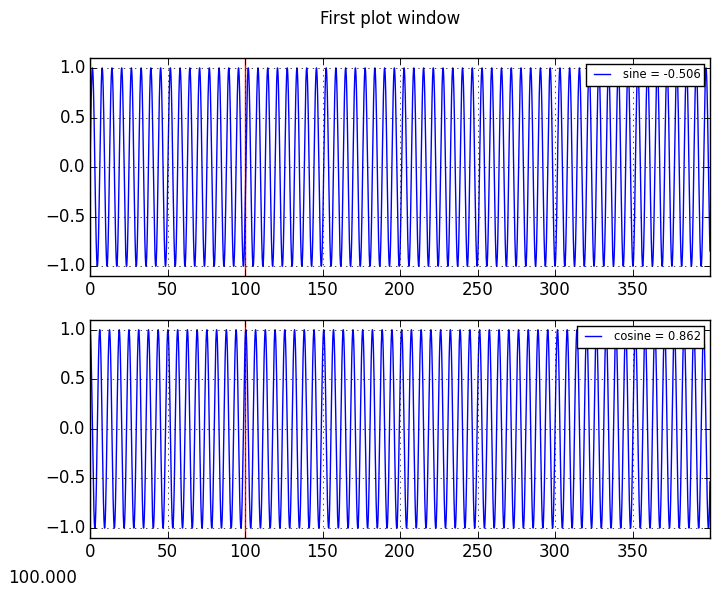

In [11]:
pn1.copyContentToFile("pn1.png")
Image("pn1.png")

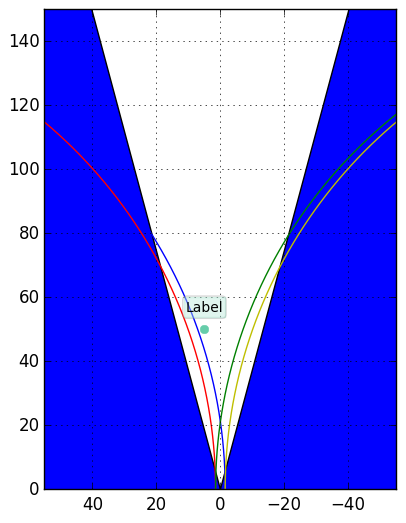

In [12]:
TN.copyContentToFile("TN.png")
Image("TN.png")

In [14]:
objNxtVideoNavigator.copyContentToFile("VN.png")
Image("VN.png")
# try:
#     from IPython.lib.guisupport import start_event_loop_qt4
#     start_event_loop_qt4(app)
# except ImportError:
#     app.exec_()
# sys.exit(app.exec_())

NameError: name 'objNxtVideoNavigator' is not defined